# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2022-12-18 15:09:14,765 | INFO : Running online!
2022-12-18 15:09:14,799 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2022-12-18 15:09:15,201 | INFO : 2022-12-18_15-09-15-201783
2022-12-18 15:09:15,244 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2022-12-18 15:09:15,484 | INFO : 2022-12-18_15-09-15-484323
2022-12-18 15:09:15,527 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2022-12-18 15:09:15,763 | INFO : 2022-12-18_15-09-15-763472
2022-12-18 15:09:15,804 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2022-12-18 15:09:16,038 | INFO : 2022-12-18_15-09-16-038277
2022-12-18 15:09:16,080 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7416107646898188
2022-12-18 15:09:16,316 | INFO : 2022-12-18_15-09-16-316639
2022-12-18 15:09:16,386 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.2013423039081823
2022-12-18 15:09:16,620 | INFO : 2022-12-18_15-09-16-620815
2022-12-18 15:09:16,662 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.3389261568734542
2022-12-18 15:09:16,893 | INFO : 2022-12-18_15-09-16-893258
2022-12-18 15

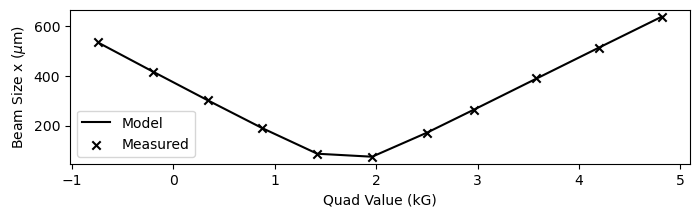

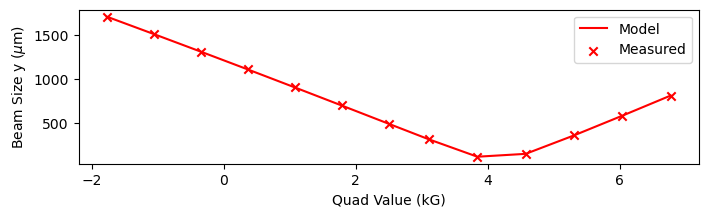

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.74161076, -0.2013423 ,  0.33892616,  0.87919462,  1.41946308,
         1.95973154,  2.5       ,  2.96308725,  3.58053692,  4.19798659,
         4.81543626]),
 'beamsizesx': array([5.35238659e-04, 4.16661499e-04, 3.02253914e-04, 1.88951773e-04,
        8.67142652e-05, 7.45944728e-05, 1.71250120e-04, 2.64551770e-04,
        3.91943671e-04, 5.13285364e-04, 6.35825528e-04]),
 'beamsizeserrx': array([0.03344977, 0.02137838, 0.01350569, 0.0067162 , 0.00210614,
        0.00170613, 0.00780123, 0.0112108 , 0.01992289, 0.03176555,
        0.04201296]),
 'error_x': False,
 'emit_x': 6.404956928892037e-09,
 'norm_emit_x': 1.002714587413457e-06,
 'beta_x': 9.963141571796951,
 'alpha_x': -1.9854313028696982,
 'emit_x_err': 2.103313807748175e-07,
 'norm_emit_x_err': 3.292798781243433e-05,
 'beta_x_rel_err': 32.83884390011058,
 'alpha_x_rel_err': -1.982140721207883e-15,
 'sigma_11': 6.381349264381319e-08,
 'sigma_12': 1.2716601980154418e-08,
 'sigma_22': 3.176999577726214e-09,


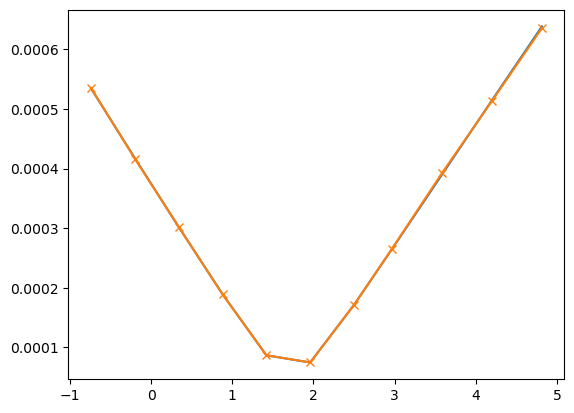

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

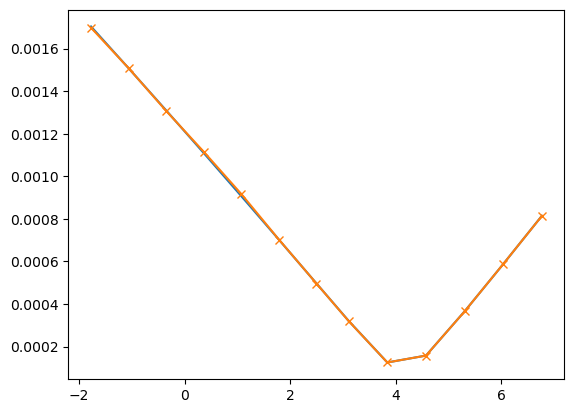

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


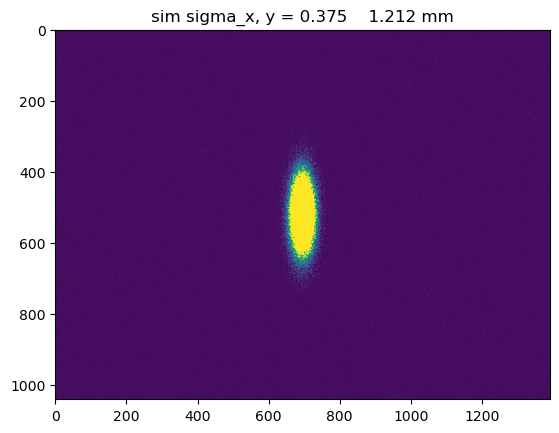

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)